In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import geopandas as gpd

In [4]:
%matplotlib inline

In [5]:
sk_province = gpd.read_file('skorea-provinces-2018-geo.json')

In [6]:
sk_muni = gpd.read_file('skorea-municipalities-2018-geo.json')

In [7]:
sk_submuni = gpd.read_file('skorea-submunicipalities-2018-geo.json')

In [8]:
sk_province.head

<bound method NDFrame.head of        name base_year           name_eng code  \
0     서울특별시      2018              Seoul   11   
1     부산광역시      2018              Busan   21   
2     대구광역시      2018              Daegu   22   
3     인천광역시      2018            Incheon   23   
4     광주광역시      2018            Gwangju   24   
5     대전광역시      2018            Daejeon   25   
6     울산광역시      2018              Ulsan   26   
7   세종특별자치시      2018           Sejongsi   29   
8       경기도      2018        Gyeonggi-do   31   
9       강원도      2018         Gangwon-do   32   
10     충청북도      2018  Chungcheongbuk-do   33   
11     충청남도      2018  Chungcheongnam-do   34   
12     전라북도      2018       Jeollabuk-do   35   
13     전라남도      2018       Jeollanam-do   36   
14     경상북도      2018   Gyeongsangbuk-do   37   
15     경상남도      2018   Gyeongsangnam-do   38   
16  제주특별자치도      2018            Jeju-do   39   

                                             geometry  
0   POLYGON ((127.02215 37.6997

In [9]:
sk_muni.head

<bound method NDFrame.head of      name base_year      name_eng   code  \
0     종로구      2018     Jongno-gu  11010   
1      중구      2018       Jung-gu  11020   
2     용산구      2018    Yongsan-gu  11030   
3     성동구      2018  Seongdong-gu  11040   
4     광진구      2018   Gwangjin-gu  11050   
..    ...       ...           ...    ...   
245   함양군      2018   Hamyang-gun  38380   
246   거창군      2018  Geochang-gun  38390   
247   합천군      2018  Hapcheon-gun  38400   
248   제주시      2018       Jeju-si  39010   
249  서귀포시      2018   Seogwipo-si  39020   

                                              geometry  
0    MULTIPOLYGON (((126.97468 37.62981, 126.97497 ...  
1    MULTIPOLYGON (((127.02339 37.57190, 127.02358 ...  
2    MULTIPOLYGON (((126.97059 37.55388, 126.97059 ...  
3    MULTIPOLYGON (((127.04324 37.57241, 127.04491 ...  
4    MULTIPOLYGON (((127.10385 37.57049, 127.10272 ...  
..                                                 ...  
245  MULTIPOLYGON (((127.69511 35.75798, 1

In [10]:
sk_submuni.head

<bound method NDFrame.head of      name base_year          name_eng     code  \
0     사직동      2018        Sajik-dong  1101053   
1     삼청동      2018    Samcheong-dong  1101054   
2     부암동      2018         Buam-dong  1101055   
3     평창동      2018  Pyeongchang-dong  1101056   
4     무악동      2018         Muak-dong  1101057   
...   ...       ...               ...      ...   
3499  서홍동      2018      Seohong-dong  3902058   
3500  대륜동      2018       Daeryundong  3902059   
3501  대천동      2018     Daecheon-dong  3902060   
3502  중문동      2018      Jungmun-dong  3902061   
3503  예래동      2018         Yeraedong  3902062   

                                               geometry  
0     MULTIPOLYGON (((126.96894 37.57815, 126.96965 ...  
1     MULTIPOLYGON (((126.97714 37.59768, 126.97874 ...  
2     MULTIPOLYGON (((126.96173 37.60714, 126.96267 ...  
3     MULTIPOLYGON (((126.96267 37.60567, 126.96173 ...  
4     MULTIPOLYGON (((126.95975 37.58001, 126.96111 ...  
...                  

In [26]:
sk_submuni.dtypes

name           object
base_year      object
name_eng       object
code           object
geometry     geometry
dtype: object

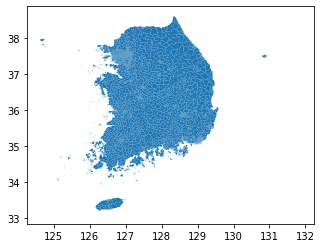

In [11]:
sk_submuni.plot();

In [22]:
#seoul = sk_province.drop([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], axis=0)

In [23]:
#seoul

,name,base_year,name_eng,code,geometry
0,서울특별시,2018,Seoul,11,"POLYGON ((127.02215 37.69972, 127.02532 37.699..."


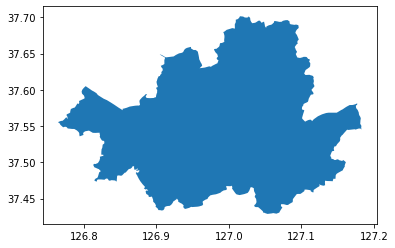

In [24]:
seoul.plot()

# Merge Attempt Below

In [41]:
city_submuni = gpd.sjoin(sk_province, sk_submuni, how="inner", op='intersects')

In [42]:
city_submuni

,name_left,base_year_left,name_eng_left,code_left,geometry,index_right,name_right,base_year_right,name_eng_right,code_right
0,서울특별시,2018,Seoul,11,"POLYGON ((127.02215 37.69972, 127.02532 37.699...",1534,감북동,2018,Gambuk-dong,3118064
8,경기도,2018,Gyeonggi-do,31,"MULTIPOLYGON (((126.74268 37.03800, 126.74268 ...",1534,감북동,2018,Gambuk-dong,3118064
0,서울특별시,2018,Seoul,11,"POLYGON ((127.02215 37.69972, 127.02532 37.699...",1530,초이동,2018,Choi-dong,3118060
8,경기도,2018,Gyeonggi-do,31,"MULTIPOLYGON (((126.74268 37.03800, 126.74268 ...",1530,초이동,2018,Choi-dong,3118060
0,서울특별시,2018,Seoul,11,"POLYGON ((127.02215 37.69972, 127.02532 37.699...",1531,풍산동,2018,Pungsan-dong,3118061
...,...,...,...,...,...,...,...,...,...,...
16,제주특별자치도,2018,Jeju-do,39,"MULTIPOLYGON (((126.26792 33.12430, 126.26798 ...",3474,용담1동,2018,Yongdam 1(il)-dong,3901057
16,제주특별자치도,2018,Jeju-do,39,"MULTIPOLYGON (((126.26792 33.12430, 126.26798 ...",3473,삼도2동,2018,Samdo 2(i)-dong,3901056
16,제주특별자치도,2018,Jeju-do,39,"MULTIPOLYGON (((126.26792 33.12430, 126.26798 ...",3468,일도1동,2018,Ildo 1(il)-dong,3901051
16,제주특별자치도,2018,Jeju-do,39,"MULTIPOLYGON (((126.26792 33.12430, 126.26798 ...",3478,삼양동,2018,Samyang-dong,3901061


In [48]:
seoulnbds = city_submuni.loc[0] 

In [51]:
seoulnbds

,name_left,base_year_left,name_eng_left,code_left,geometry,index_right,name_right,base_year_right,name_eng_right,code_right
0,서울특별시,2018,Seoul,11,"POLYGON ((127.02215 37.69972, 127.02532 37.699...",1534,감북동,2018,Gambuk-dong,3118064
0,서울특별시,2018,Seoul,11,"POLYGON ((127.02215 37.69972, 127.02532 37.699...",1530,초이동,2018,Choi-dong,3118060
0,서울특별시,2018,Seoul,11,"POLYGON ((127.02215 37.69972, 127.02532 37.699...",1531,풍산동,2018,Pungsan-dong,3118061
0,서울특별시,2018,Seoul,11,"POLYGON ((127.02215 37.69972, 127.02532 37.699...",407,상일동,2018,Sangil-dong,1125052
0,서울특별시,2018,Seoul,11,"POLYGON ((127.02215 37.69972, 127.02532 37.699...",406,강일동,2018,Gangildong,1125051
...,...,...,...,...,...,...,...,...,...,...
0,서울특별시,2018,Seoul,11,"POLYGON ((127.02215 37.69972, 127.02532 37.699...",250,가양1동,2018,Gayang 1(il)-dong,1116064
0,서울특별시,2018,Seoul,11,"POLYGON ((127.02215 37.69972, 127.02532 37.699...",192,천연동,2018,Cheonyeon-dong,1113052
0,서울특별시,2018,Seoul,11,"POLYGON ((127.02215 37.69972, 127.02532 37.699...",1337,오정동,2018,Ojeong-dong,3105083
0,서울특별시,2018,Seoul,11,"POLYGON ((127.02215 37.69972, 127.02532 37.699...",878,계양3동,2018,Gyeyang 2-dong,2307064


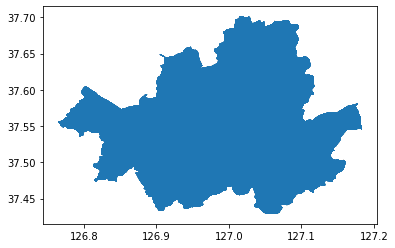